In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv(r"D:\Machine Learning Development\original\Machine-Learning-Pipeline-Overview\train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.shape

(1460, 81)

In [11]:
variables_with_null = [i for i in data.columns if data[i].isnull().sum() >0]

data[variables_with_null].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

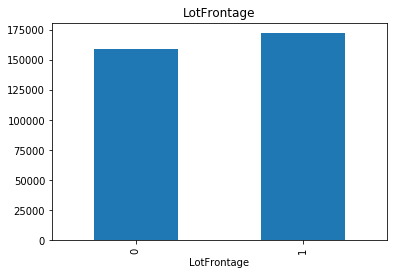

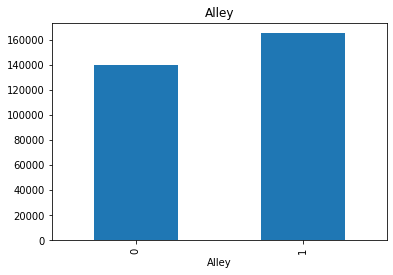

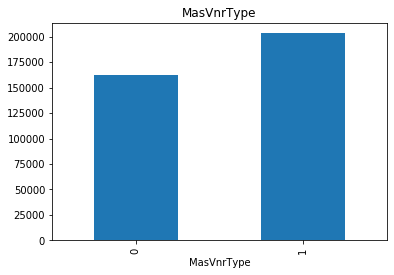

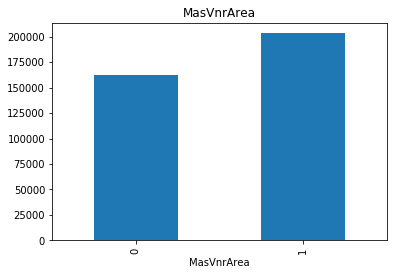

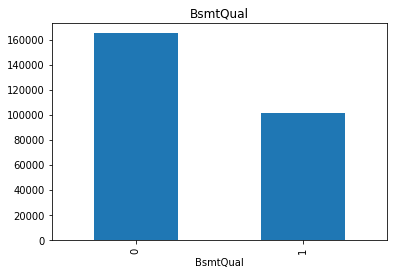

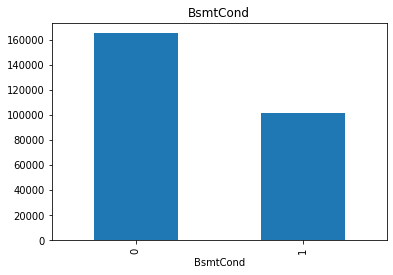

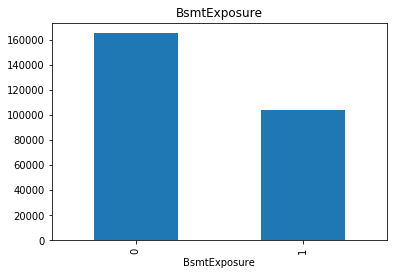

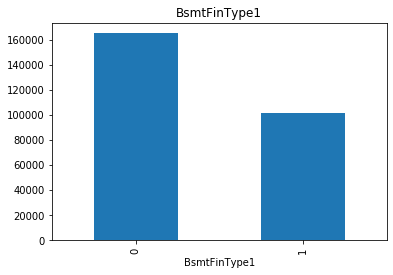

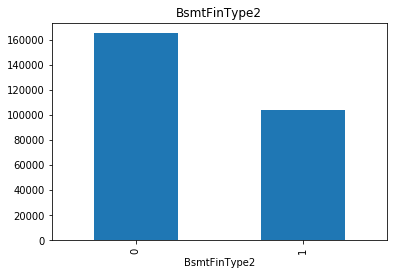

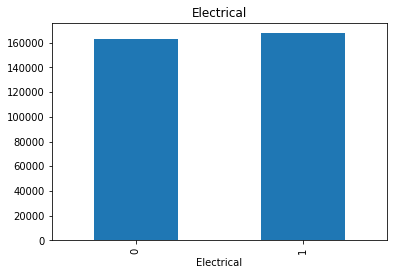

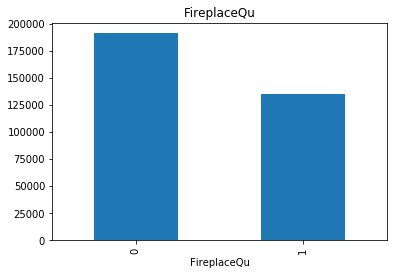

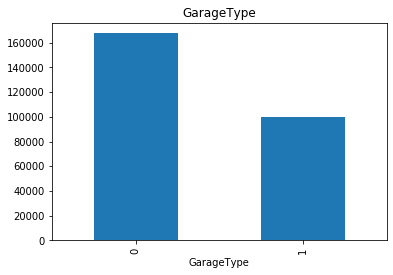

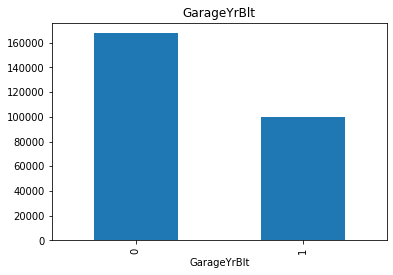

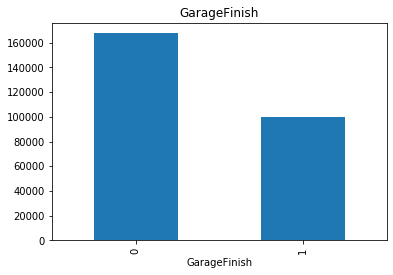

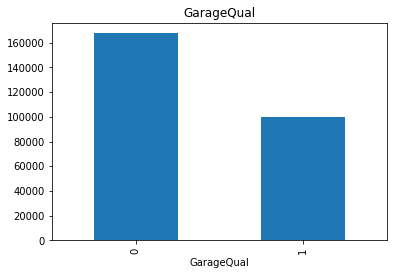

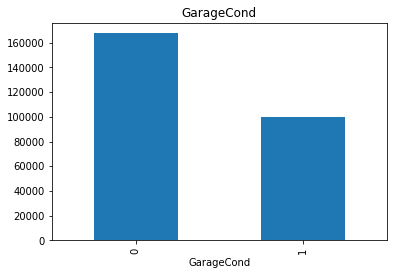

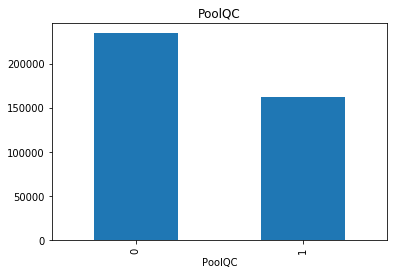

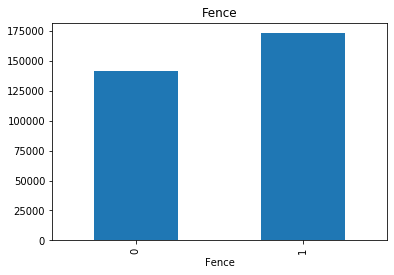

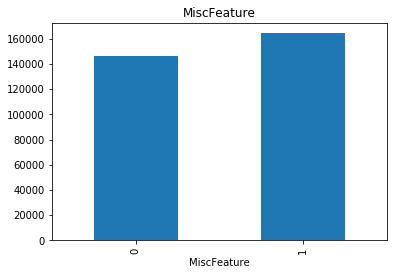

In [13]:
def analyze_na_value(df, var):
    df = df.copy()
    
    df[var] = np.where(df[var].isnull(),1,0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    
    plt.title(var)
    
    plt.show()
    
for var in variables_with_null:
    analyze_na_value(data,var)

In [14]:
numerical_variables = [i for i in data.columns if data[i].dtypes != 'O' ]

print('Number of Numerical Variables : ',len(numerical_variables))

Number of Numerical Variables :  38


In [18]:
year_variables = [i for i in data.columns if 'Year' in i or 'Yr' in i]
year_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'CHange in House price with the years')

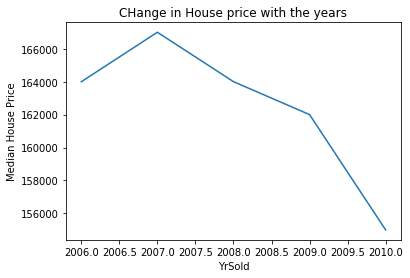

In [20]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('CHange in House price with the years')

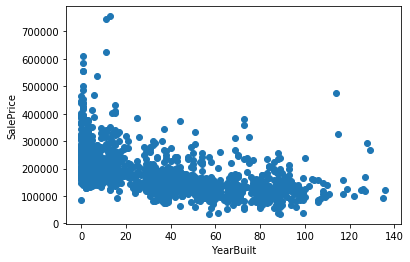

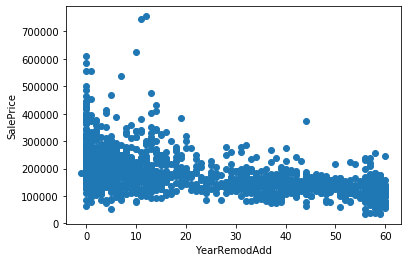

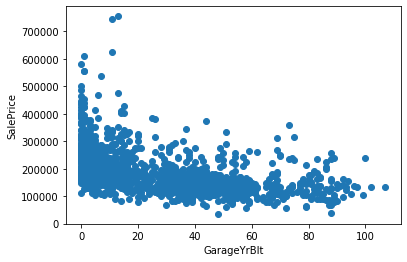

In [21]:
def analyze_year_vars(df,var):
    df = df.copy()
    df[var]=df['YrSold']-df[var]
    plt.scatter(df[var],df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for i in year_variables:
    if i != 'YrSold':
        analyze_year_vars(data,i)

In [24]:
discrete_variables = [i for i in numerical_variables if len(data[i].unique())<20 and i not in year_variables+['Id']]
print('Number of discrete variables: ', len(discrete_variables))

Number of discrete variables:  14


In [25]:
data[discrete_variables].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


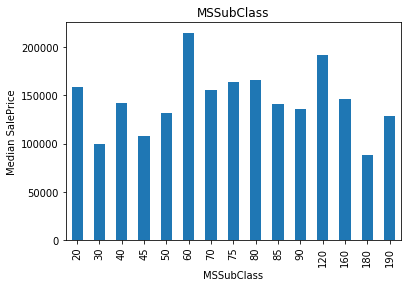

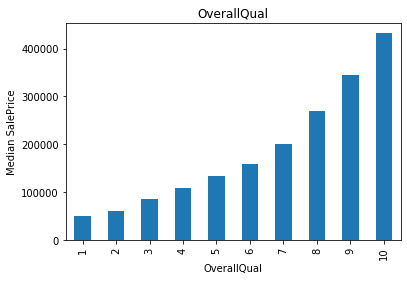

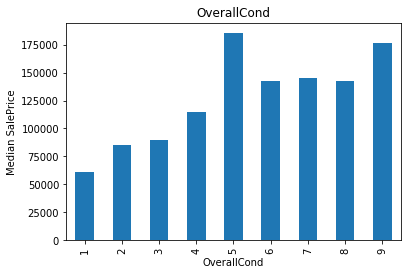

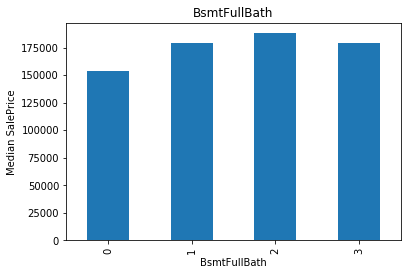

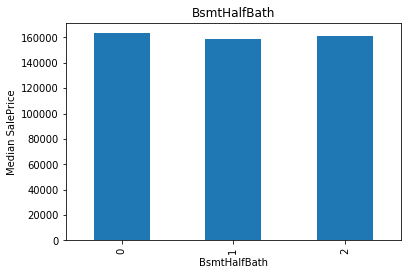

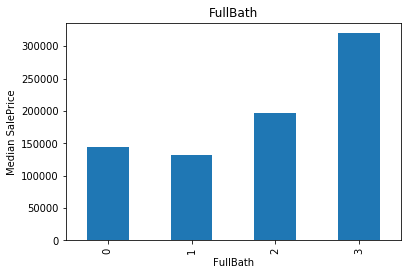

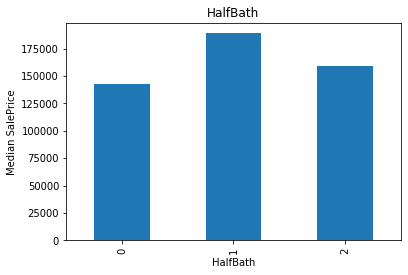

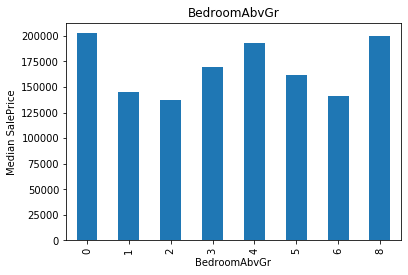

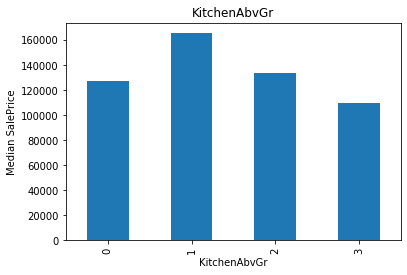

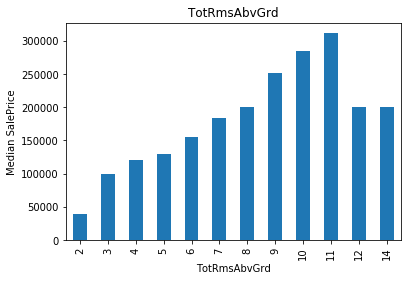

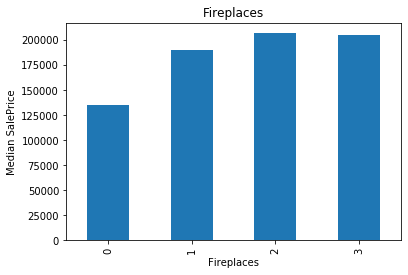

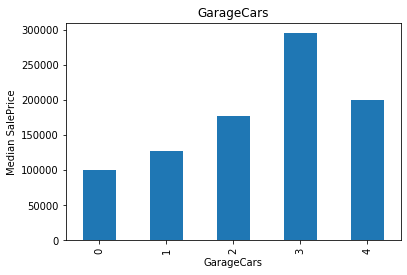

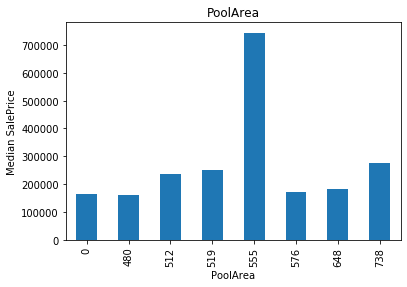

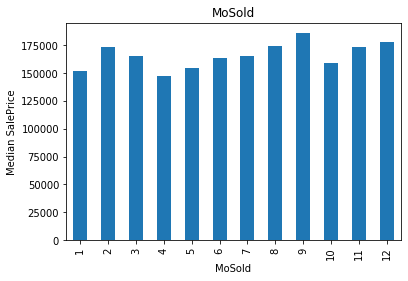

In [26]:
def analyze_discrete_variables(df,var):
    df=df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()
    
for i in discrete_variables:
    analyze_discrete_variables(data,i)

In [27]:
continuous_variables = [ i for i in numerical_variables if i not in year_variables+['Id']+discrete_variables]
print('Number of Continuous Variables:', len(continuous_variables))

Number of Continuous Variables: 19


In [28]:
data[continuous_variables].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


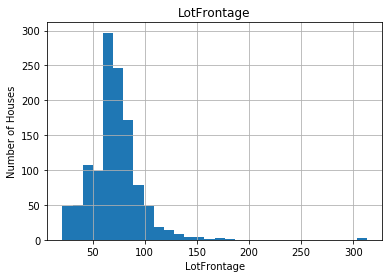

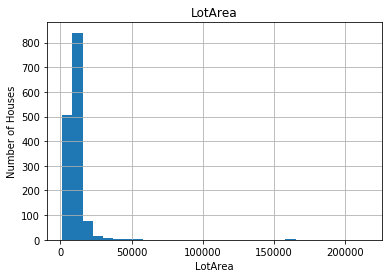

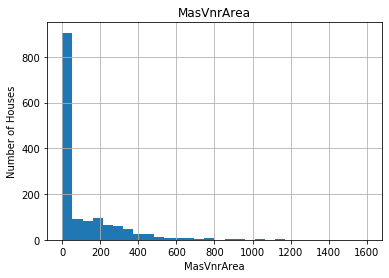

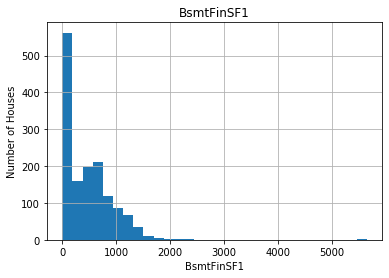

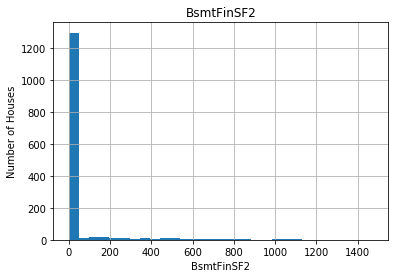

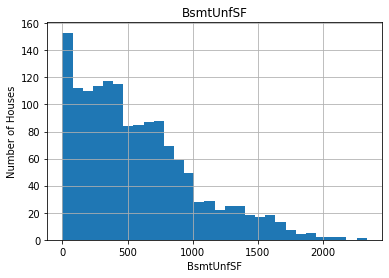

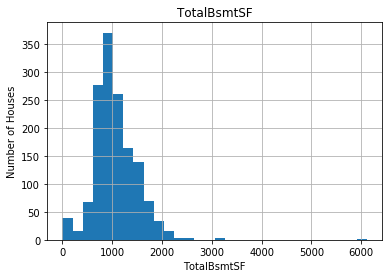

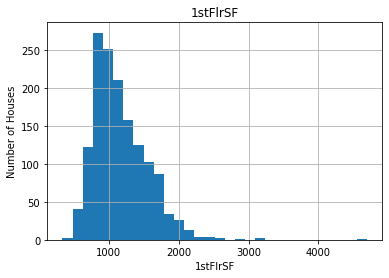

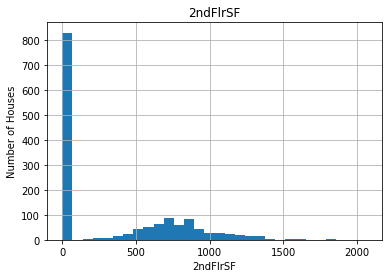

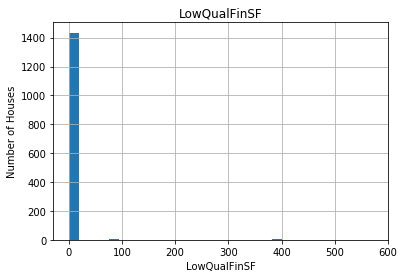

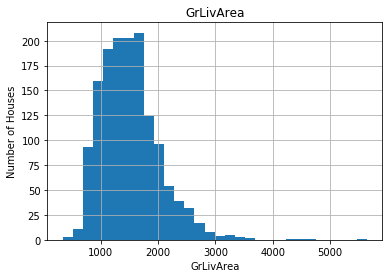

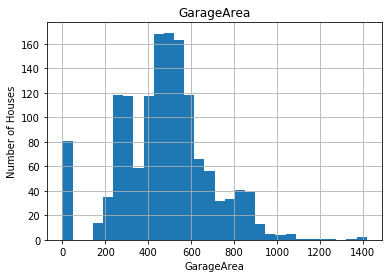

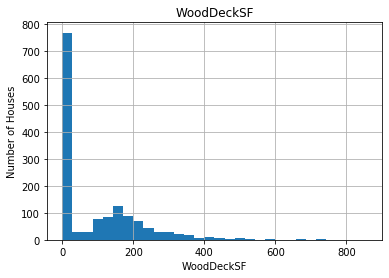

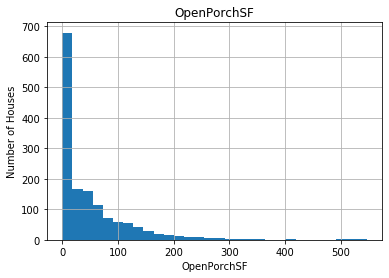

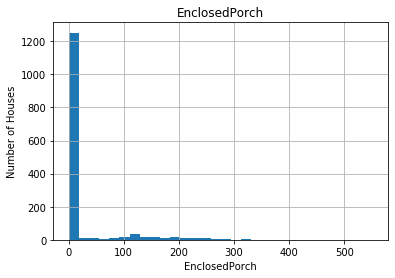

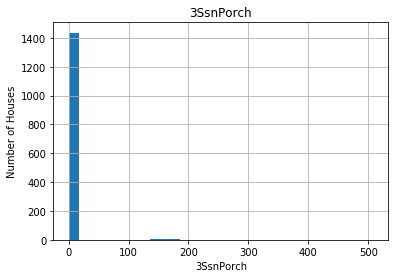

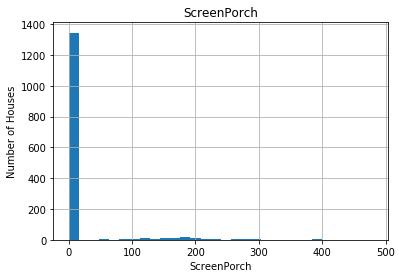

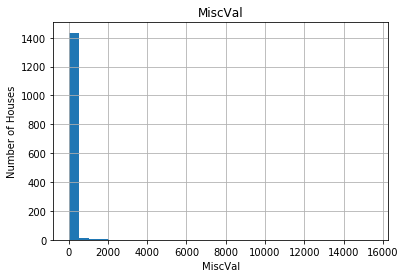

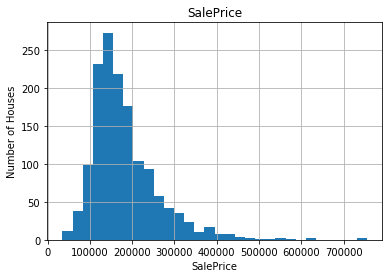

In [30]:
def analyze_continuous_variables(df,var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of Houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for i in continuous_variables:
    analyze_continuous_variables(data,i)

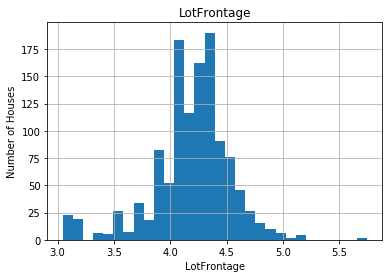

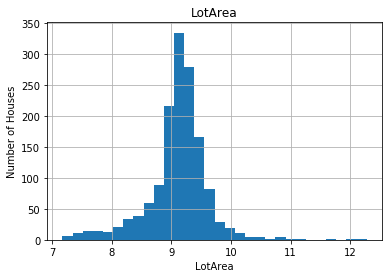

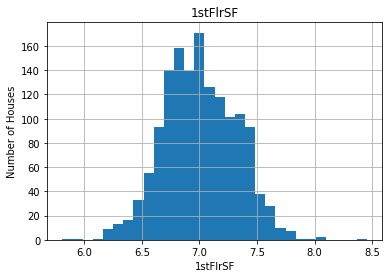

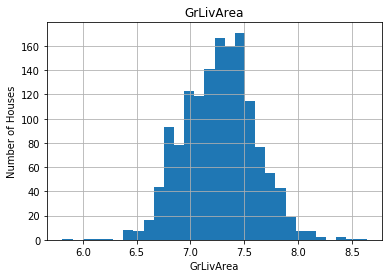

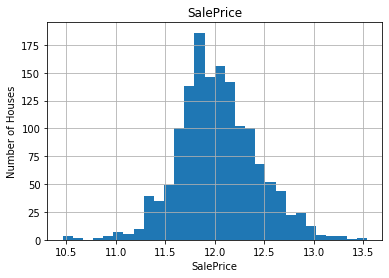

In [32]:
def analyze_transformed_continuous(df,var):
    df = df.copy()
    
    if any(data[var]<=0):
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of Houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
        
for i in continuous_variables:
    analyze_transformed_continuous(data,i)

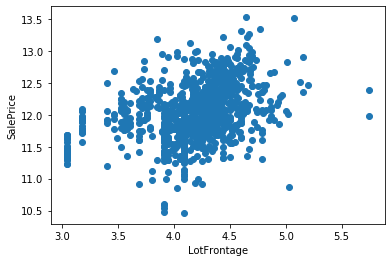

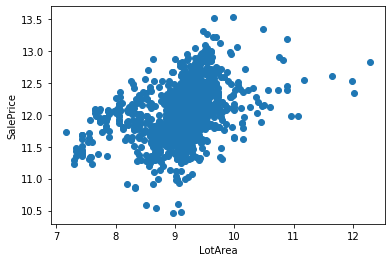

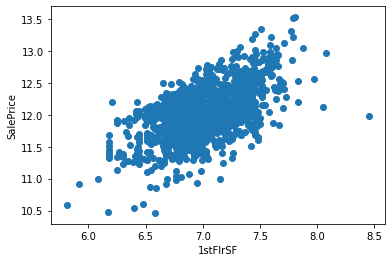

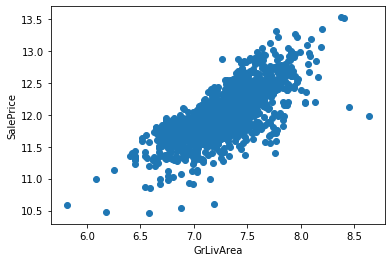

In [33]:
def tranform_analyze_continuous(df, var):
    df = df.copy()
    
    if any(df[var]<=0):
        pass
    else:
        df[var]=np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var],df['SalePrice'])
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.show()
        
        
for i in continuous_variables:
    if i != 'SalePrice':
        tranform_analyze_continuous(data,i)

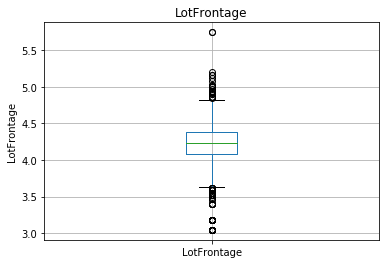

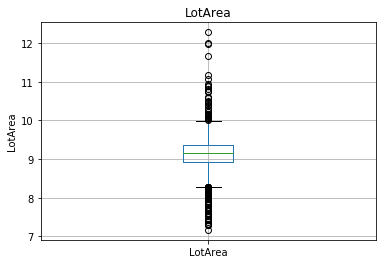

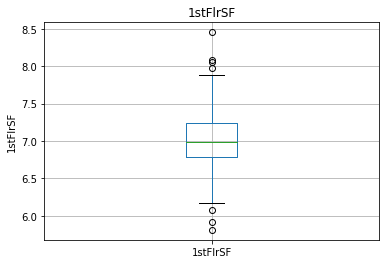

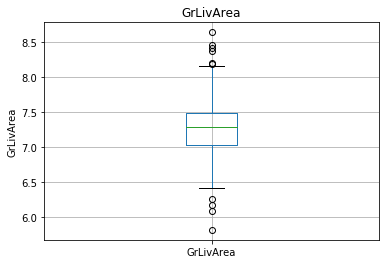

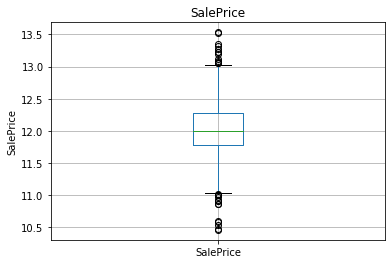

In [34]:
def find_outlier(df, var):
    df = df.copy()
    
    
    if any(df[var]<=0):
        pass
    else:
        df[var]=np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
        
        
for i in continuous_variables:
    find_outlier(data, i)

In [37]:
categorical_variables = [i for i in data.columns if data[i].dtypes == 'O']

print('Number of Categorical Variables: ', len(categorical_variables))

Number of Categorical Variables:  43


In [38]:
data[categorical_variables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
data[categorical_variables].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [42]:
def analyze_rare_labels(df, var, rare_percent):
    df= df.copy()
    
    tmp = df.groupby(var)['SalePrice'].count()/len(df)
    
    return tmp[tmp<rare_percent]


for i in categorical_variables:
    print(analyze_rare_labels(data,i,.02))
    print()
    print()

MSZoning
C (all)    0.006849
RH         0.010959
Name: SalePrice, dtype: float64


Street
Grvl    0.00411
Name: SalePrice, dtype: float64


Series([], Name: SalePrice, dtype: float64)


LotShape
IR3    0.006849
Name: SalePrice, dtype: float64


Series([], Name: SalePrice, dtype: float64)


Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64


LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64


LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64


Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
ClearCr    0.019178
MeadowV    0.011644
NPkVill    0.006164
SWISU      0.017123
StoneBr    0.017123
Veenker    0.007534
Name: SalePrice, dtype: float64


Condition1
PosA    0.005479
PosN    0.013014
RRAe    0.007534
RRAn    0.017808
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64


Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: Sal

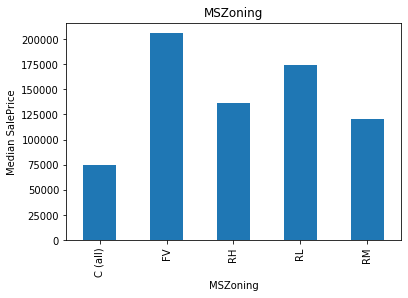

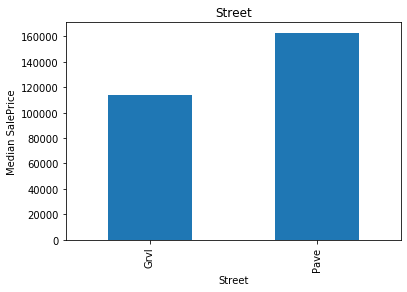

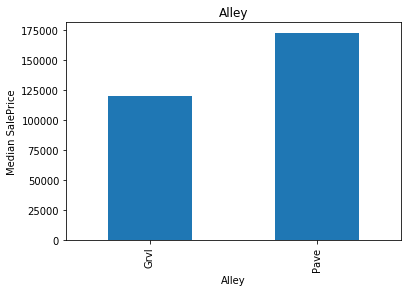

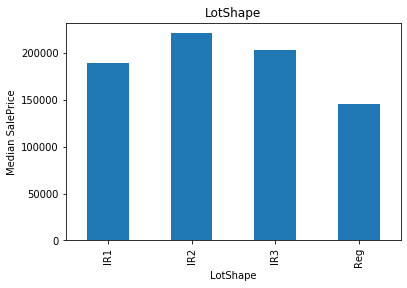

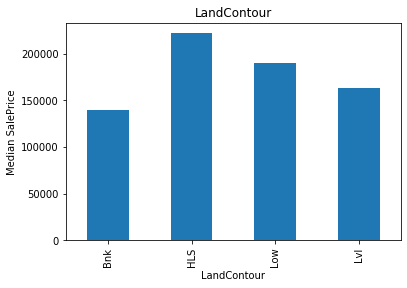

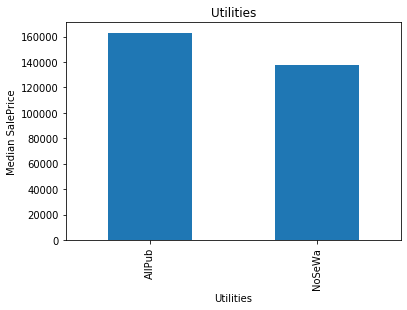

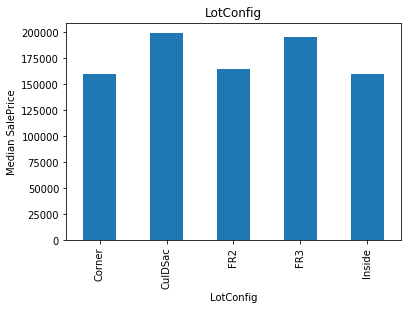

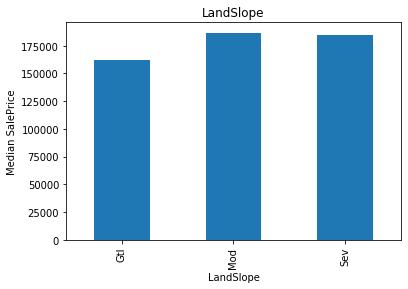

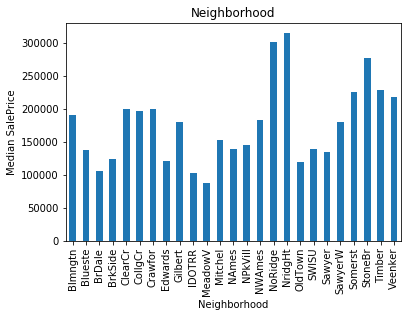

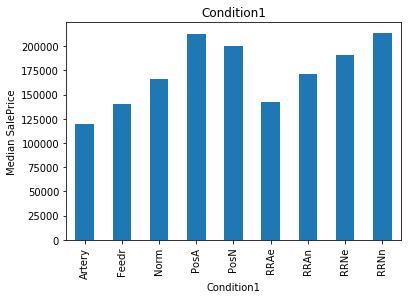

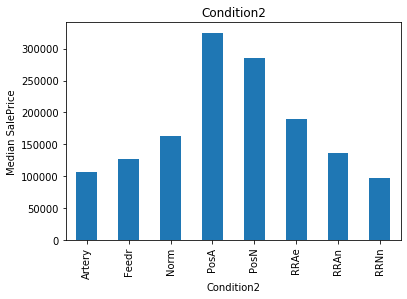

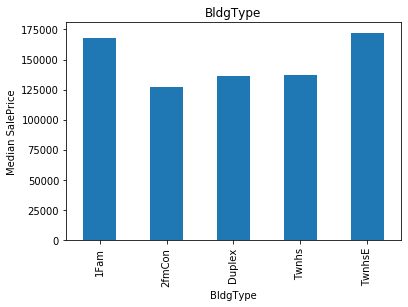

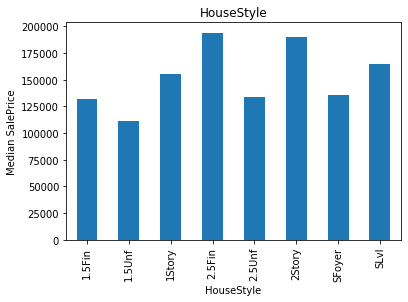

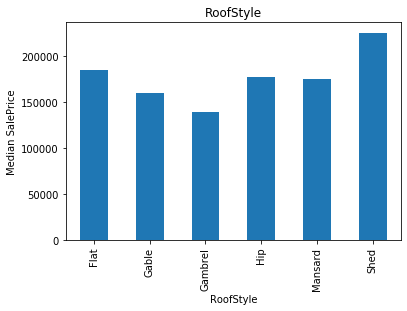

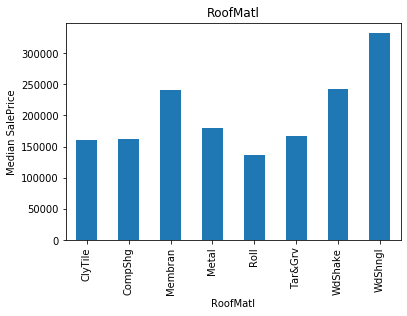

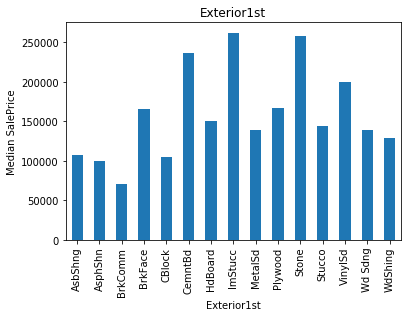

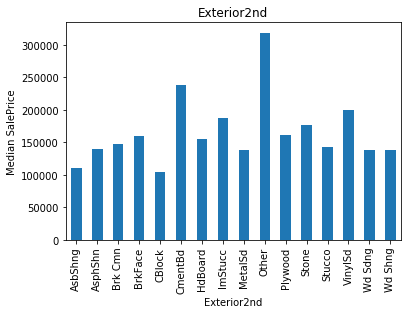

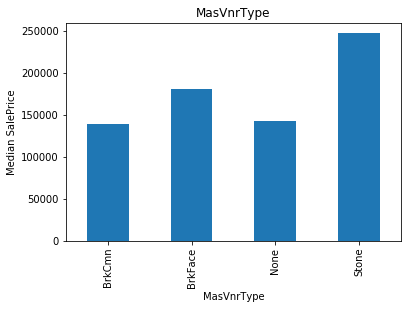

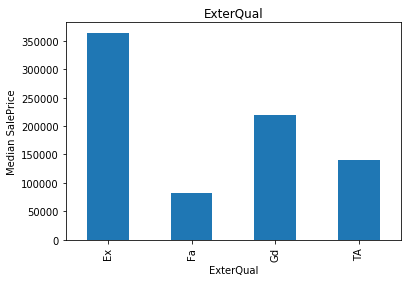

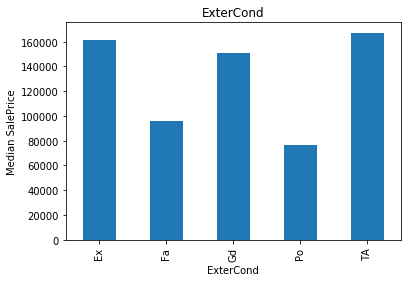

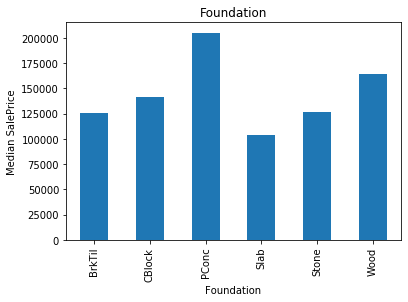

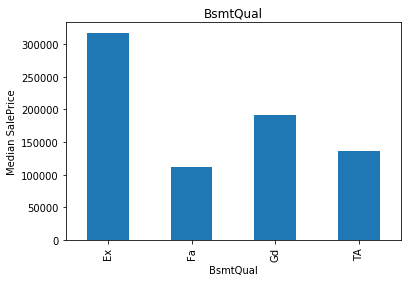

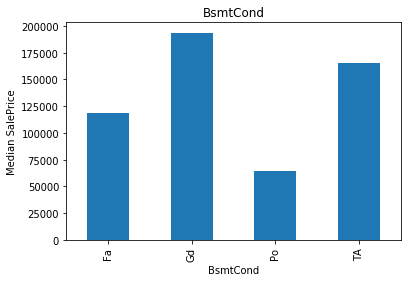

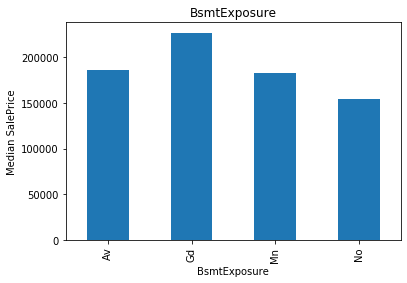

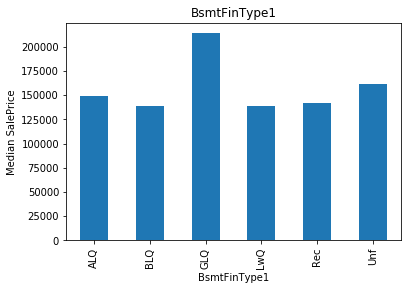

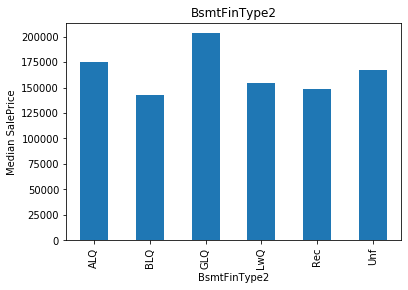

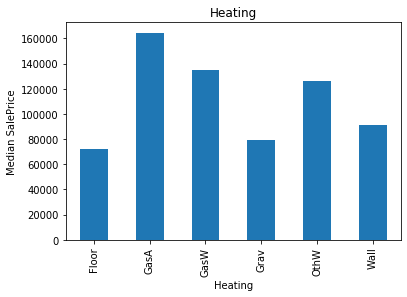

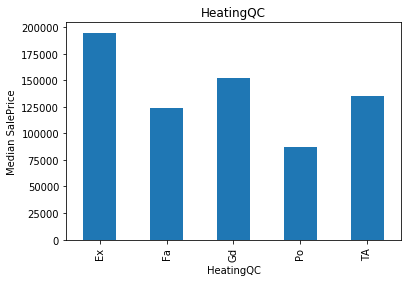

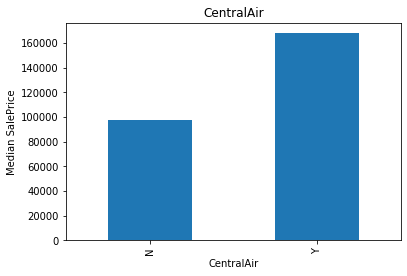

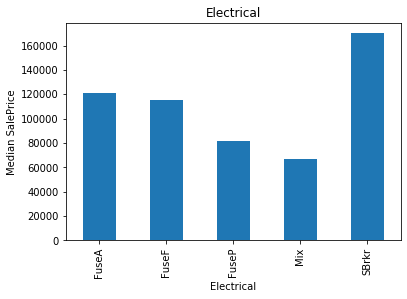

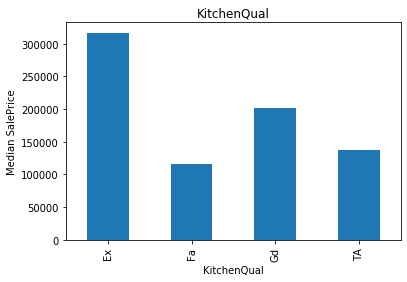

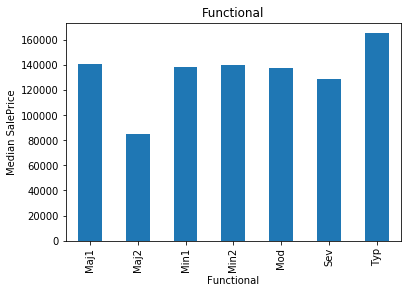

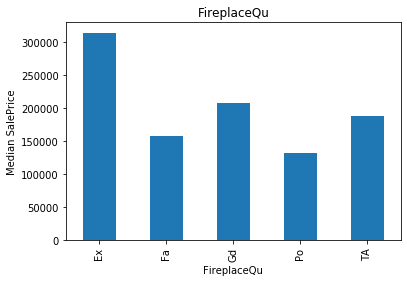

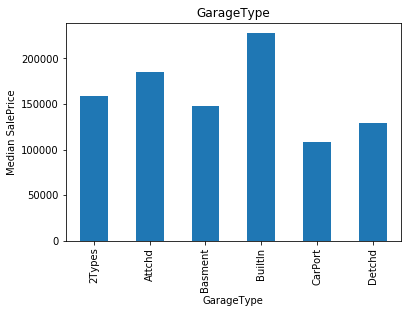

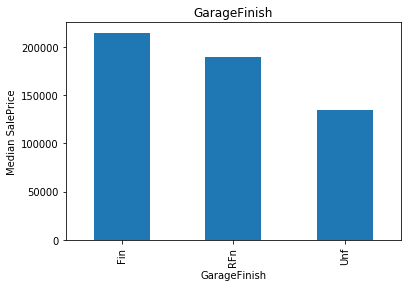

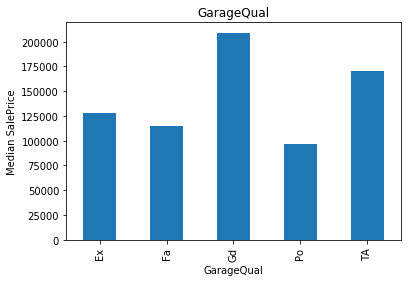

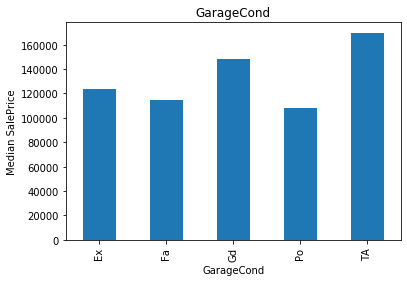

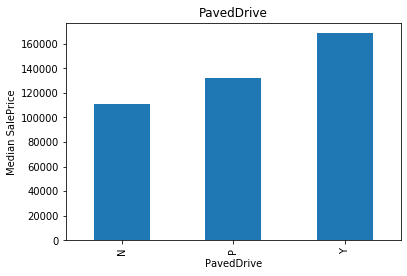

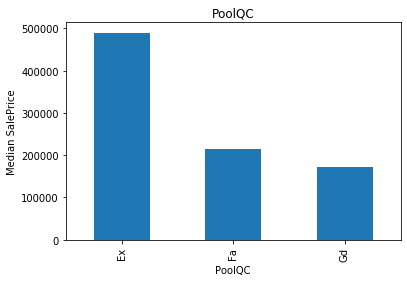

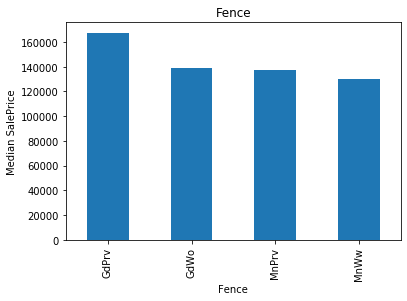

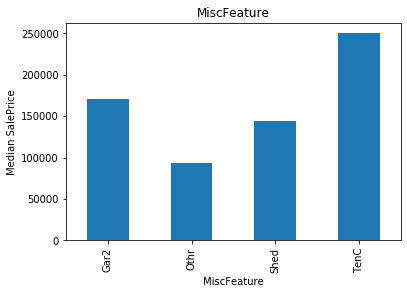

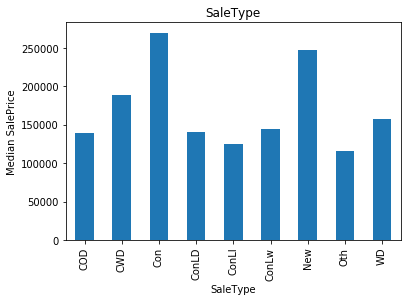

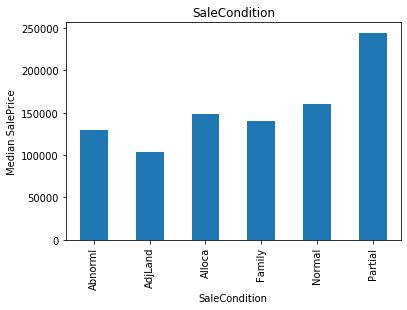

In [43]:
for i in categorical_variables:
    analyze_discrete_variables(data,i)